## Crimes explored are Dacoity Robbery, Burglary, Theft in India.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/17_Crime_by_place_of_occurrence_2001_2012.csv')
df1 = pd.read_csv('Data/17_Crime_by_place_of_occurrence_2013.csv')

In [3]:
df.head(3)
df['STATE/UT'] = df['STATE/UT'].str.lower().replace(' ', '')
df1['STATE/UT'] = df1['STATE/UT'].str.lower().replace(' ', '')
df['STATE/UT'].value_counts()

# daman and diu has 13 instead of 12

daman & diu          13
jammu & kashmir      12
haryana              12
manipur              12
uttar pradesh        12
tamil nadu           12
lakshadweep          12
andhra pradesh       12
delhi                12
total (states)       12
chhattisgarh         12
karnataka            12
a & n islands        12
total (uts)          12
chandigarh           12
west bengal          12
rajasthan            12
puducherry           12
madhya pradesh       12
sikkim               12
odisha               12
himachal pradesh     12
goa                  12
punjab               12
kerala               12
nagaland             12
bihar                12
total (all-india)    12
gujarat              12
maharashtra          12
assam                12
meghalaya            12
jharkhand            12
uttarakhand          12
mizoram              12
d & n haveli         12
arunachal pradesh    12
tripura              11
Name: STATE/UT, dtype: int64

In [4]:
df1['STATE/UT'].value_counts()

meghalaya            1
lakshadweep          1
karnataka            1
madhya pradesh       1
tamil nadu           1
uttar pradesh        1
d&n haveli           1
kerala               1
andhra pradesh       1
haryana              1
jammu & kashmir      1
chhattisgarh         1
total (uts)          1
chandigarh           1
west bengal          1
rajasthan            1
delhi ut             1
puducherry           1
sikkim               1
himachal pradesh     1
a&n islands          1
uttarakhand          1
odisha               1
daman & diu          1
total (state)        1
goa                  1
punjab               1
manipur              1
nagaland             1
bihar                1
tripura              1
total (all-india)    1
gujarat              1
maharashtra          1
assam                1
mizoram              1
jharkhand            1
arunachal pradesh    1
Name: STATE/UT, dtype: int64

In [5]:
df_final = df.append(df1)

In [6]:
df_final['STATE/UT'].value_counts()

daman & diu          14
jammu & kashmir      13
andhra pradesh       13
karnataka            13
madhya pradesh       13
manipur              13
uttar pradesh        13
tamil nadu           13
lakshadweep          13
haryana              13
himachal pradesh     13
chhattisgarh         13
total (uts)          13
chandigarh           13
west bengal          13
rajasthan            13
puducherry           13
odisha               13
sikkim               13
arunachal pradesh    13
mizoram              13
uttarakhand          13
jharkhand            13
meghalaya            13
assam                13
goa                  13
maharashtra          13
gujarat              13
total (all-india)    13
punjab               13
kerala               13
nagaland             13
bihar                13
a & n islands        12
delhi                12
tripura              12
total (states)       12
d & n haveli         12
d&n haveli            1
delhi ut              1
total (state)         1
a&n islands     

In [7]:
## Combining rows
df_final = df_final.replace('d&n haveli', 'd & n haveli')
df_final = df_final.replace('a & n islands', 'a&n islands')
df_final = df_final.replace('delhi ut', 'delhi')
df_final = df_final.replace('total (state)', 'total (states)')

In [8]:
df_final['STATE/UT'].value_counts()

daman & diu          14
jammu & kashmir      13
total (states)       13
madhya pradesh       13
manipur              13
uttar pradesh        13
tamil nadu           13
lakshadweep          13
andhra pradesh       13
delhi                13
haryana              13
sikkim               13
chhattisgarh         13
total (uts)          13
chandigarh           13
west bengal          13
rajasthan            13
puducherry           13
karnataka            13
himachal pradesh     13
odisha               13
a&n islands          13
goa                  13
punjab               13
kerala               13
nagaland             13
bihar                13
total (all-india)    13
gujarat              13
maharashtra          13
assam                13
meghalaya            13
jharkhand            13
uttarakhand          13
mizoram              13
d & n haveli         13
arunachal pradesh    13
tripura              12
Name: STATE/UT, dtype: int64

In [9]:
#Daman and diu extra row occurs in 2008

temp = df_final[df_final['STATE/UT'] == 'daman & diu'][df_final[df_final['STATE/UT'] == 'daman & diu']['YEAR'] == 2008]
df_final.drop(index = temp.index, axis = 0, inplace=True)
temp.reset_index(drop = True)
list1 = []
for r in temp.columns:
    list1.append(max(temp.iloc[0][r],temp.iloc[1][r]))
df_final = df_final.append(list1)

In [10]:
df_final['STATE/UT'].value_counts()

jammu & kashmir      13
delhi                13
karnataka            13
madhya pradesh       13
manipur              13
uttar pradesh        13
tamil nadu           13
lakshadweep          13
andhra pradesh       13
total (states)       13
odisha               13
haryana              13
chhattisgarh         13
total (uts)          13
chandigarh           13
west bengal          13
rajasthan            13
puducherry           13
sikkim               13
himachal pradesh     13
a&n islands          13
gujarat              13
goa                  13
punjab               13
kerala               13
nagaland             13
bihar                13
d & n haveli         13
total (all-india)    13
maharashtra          13
assam                13
meghalaya            13
jharkhand            13
uttarakhand          13
mizoram              13
arunachal pradesh    13
tripura              12
daman & diu          12
Name: STATE/UT, dtype: int64

In [11]:
cols_to_add = ['TOTAL - Burglary',
                'TOTAL - Dacoity',
                'TOTAL - Robbery',
              'TOTAL - Theft']
df_final['TOTAL - Crimes'] = 0
for col in cols_to_add:
    df_final['TOTAL - Crimes'] = df_final['TOTAL - Crimes'] + df_final[col]

#### Trend in all of India

<AxesSubplot:xlabel='YEAR'>

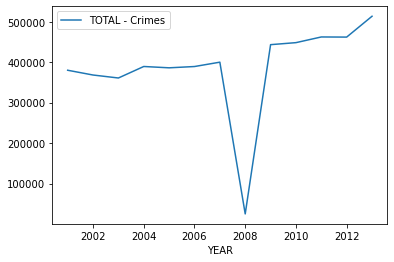

In [12]:
to_plot = df_final[df_final['STATE/UT'] == 'total (all-india)'][['YEAR', 'TOTAL - Crimes']]
to_plot.index = to_plot['YEAR']
to_plot.drop('YEAR', axis = 1, inplace = True)
to_plot.plot()